In [82]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

In [83]:
users = pd.read_csv('takehome_users.csv')
engage = pd.read_csv('takehome_user_engagement.csv')

In [84]:
users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [85]:
engage.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [86]:
engage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   time_stamp  207917 non-null  object
 1   user_id     207917 non-null  int64 
 2   visited     207917 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 4.8+ MB


In [87]:
engage['time_stamp'] = pd.to_datetime(engage['time_stamp'])
engage = engage.set_index('time_stamp')
engage.head()


,user_id,visited
time_stamp,,
2014-04-22 03:53:30,1,1
2013-11-15 03:45:04,2,1
2013-11-29 03:45:04,2,1
2013-12-09 03:45:04,2,1
2013-12-25 03:45:04,2,1


In [88]:
data_weekly = engage.groupby(['user_id', pd.Grouper(freq = '7D')]).sum()

In [89]:
data_weekly.head()

visited
user_id time_stamp         
1       2014-04-17        1
2       2013-11-14        1
        2013-11-28        1
        2013-12-05        1
        2013-12-19        1

In [90]:
data_filtered = data_weekly.loc[data_weekly['visited'] >=3, :]

In [91]:
data_filtered

visited
user_id time_stamp         
10      2013-02-14        3
        2013-02-28        3
        2013-03-14        3
        2013-04-11        4
        2013-04-25        4
...                     ...
11988   2014-03-27        3
        2014-04-10        4
        2014-04-24        4
        2014-05-15        5
        2014-05-22        4

[33829 rows x 1 columns]

In [92]:
data_filtered = data_filtered.reset_index()

In [93]:
adopted_users = data_filtered['user_id'].unique()

In [94]:
adopted_users

array([   10,    42,    43, ..., 11969, 11975, 11988], dtype=int64)

In [95]:
df_adopted_users = pd.DataFrame({"user_id": adopted_users, 'user_adoption' : 'yes'})
df_adopted_users.head()

,user_id,user_adoption
0,10,yes
1,42,yes
2,43,yes
3,53,yes
4,63,yes


In [96]:
combined = pd.merge(users, df_adopted_users, left_on = 'object_id', right_on = "user_id", how = 'outer')

In [97]:
combined.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,user_id,user_adoption
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,NaN,NaN
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,NaN,NaN
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,NaN,NaN
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,NaN,NaN
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,NaN,NaN


In [98]:
combined["user_adoption"].fillna("no", inplace=True)

In [99]:
combined = combined.drop("user_id", axis=1)

In [100]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12000 entries, 0 to 11999
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   object_id                   12000 non-null  int64  
 1   creation_time               12000 non-null  object 
 2   name                        12000 non-null  object 
 3   email                       12000 non-null  object 
 4   creation_source             12000 non-null  object 
 5   last_session_creation_time  8823 non-null   float64
 6   opted_in_to_mailing_list    12000 non-null  int64  
 7   enabled_for_marketing_drip  12000 non-null  int64  
 8   org_id                      12000 non-null  int64  
 9   invited_by_user_id          6417 non-null   float64
 10  user_adoption               12000 non-null  object 
dtypes: float64(2), int64(4), object(5)
memory usage: 1.1+ MB


In [101]:
combined= combined.dropna()

In [102]:
combined.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,user_adoption
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,no
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,no
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,no
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,no
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,no


In [103]:
combined_model = pd.get_dummies(combined, drop_first = True)

In [104]:
combined_model.head()

,object_id,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,creation_time_2012-05-31 01:42:31,creation_time_2012-05-31 06:23:51,creation_time_2012-05-31 08:20:06,creation_time_2012-05-31 13:14:18,...,email_zgglolpq@itusf.com,email_zghsrins@xmqve.com,email_zjxmsbdm@aqeyf.com,email_zkenbutk@rilig.com,email_zoxuhzes@eqtvz.com,email_ztusfujm@ieunf.com,email_zyxoffkk@vxdvt.com,email_zzxqnoiy@vhugu.com,creation_source_ORG_INVITE,user_adoption_yes
0,1,1.398139e+09,1,0,11,10803.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,1.396238e+09,0,0,1,316.0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,3,1.363735e+09,0,0,94,1525.0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,4,1.369210e+09,0,0,1,5151.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,1.358850e+09,0,0,193,5240.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [105]:
X= combined_model.drop("user_adoption_yes", axis=1)
Y = combined_model["user_adoption_yes"]
X_train, y_train, X_test, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)


In [107]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(class_weight='balanced_subsample')

rf.fit(X_train, X_test)

rf.score(y_train, y_test)

0.8674698795180723

In [108]:
y_pred = rf.predict(y_train)

print(classification_report(y_test, y_pred))

cm= confusion_matrix(y_test,y_pred)
print('confusion matrix:')
print(cm)

              precision    recall  f1-score   support

           0       0.87      0.98      0.92      1302
           1       0.79      0.32      0.46       275

    accuracy                           0.87      1577
   macro avg       0.83      0.65      0.69      1577
weighted avg       0.86      0.87      0.84      1577

confusion matrix:
[[1279   23]
 [ 186   89]]


In [111]:
feature_importance = pd.DataFrame()
feature_importance['coef'] = rf.feature_importances_
feature_importance = feature_importance.set_index(X.columns)
feature_importance.coef.nlargest(10)

last_session_creation_time           0.255117
org_id                               0.020887
invited_by_user_id                   0.020286
object_id                            0.015803
creation_source_ORG_INVITE           0.007225
creation_time_2014-01-16 20:36:50    0.002195
name_Pereira Giovana                 0.002058
name_Rose Aaron                      0.001970
name_Hartmann Christine              0.001952
name_Brandt Frida                    0.001869
Name: coef, dtype: float64

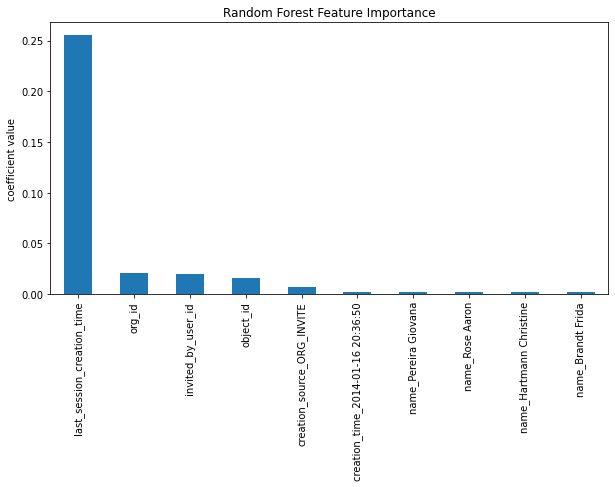

In [113]:
plt.figure(figsize=(10,5))
(feature_importance['coef']).nlargest(10).plot(kind='bar', x=feature_importance.index)
plt.title('Random Forest Feature Importance')
plt.ylabel('coefficient value')
plt.show()

The top three most important features to predict the future user adoption are :

last_session_creation_time           
org_id                               
invited_by_user_id                   